In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

med = 220
dev = 8

pr1 = norm.pdf(230,220,8)
display(pr1)

0.02283113567362774

In [2]:
pr2 = norm.cdf(225,220,8) - norm.cdf(210,220,8)
display(pr2)

0.6283646972844441

In [3]:
med = 220*10
sig = dev**2*10
dev = np.sqrt(sig)

pr3 = 1 - norm.cdf(2250,med,dev)
display(pr3)

0.02405341394425975

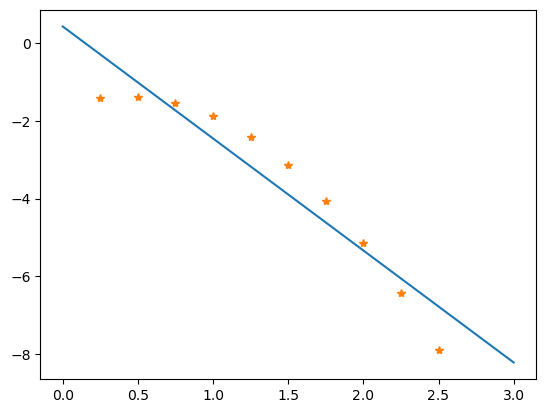

In [4]:
#2

x = np.array([0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5])
y = np.array([-1.42,-1.39 ,-1.55 ,-1.89 ,-2.43 ,-3.15 ,-4.05, -5.15 ,-6.43 ,-7.89])
x_med = np.mean(x)
y_med = np.mean(y)
n = x.size

sig_xy = np.sum((x-x_med)*(y-y_med))/n
sig_x2 = np.sum((x-x_med)**2)/n

b0 = y_med - sig_xy/sig_x2 * x_med
b1 = sig_xy/sig_x2

xx = np.linspace(0,3,100)
yy = b0 + b1*xx

plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.show()

In [5]:
y_hat = b0 + x*b1
r = y - y_hat

s2 = np.sum(r**2)/(n-2)
s = np.sqrt(s2)

from scipy.stats import t
alpha = 0.05

phi = t.ppf(1-alpha/2,n-2)

il = b0 - s*np.sqrt(1/n+x_med**2/(n*sig_x2))*phi
ir = b0 + s*np.sqrt(1/n+x_med**2/(n*sig_x2))*phi

print("intervallo di confidenza per b0: [{},{}]".format(il,ir))
print("b0: ",b0)
il = b1 - s/(np.sqrt(sig_x2)*np.sqrt(n))*phi
ir = b1 + s/(np.sqrt(sig_x2)*np.sqrt(n))*phi

print("intervallo di confidenza per b0: [{},{}]".format(il,ir))
print("b1: ",b1)

sig_y2 = np.sum((y-y_med)**2)/n
R2 = 1 - sig_xy**2/(sig_x2*sig_y2)
display(R2)

intervallo di confidenza per b0: [-0.7734427558886257,1.617442755888625]
b0:  0.4219999999999997
intervallo di confidenza per b0: [-3.6484703617164547,-2.107166001919909]
b1:  -2.877818181818182


0.09737901310065888

array([-1.633     ,  1.23218182, -1.49454545])

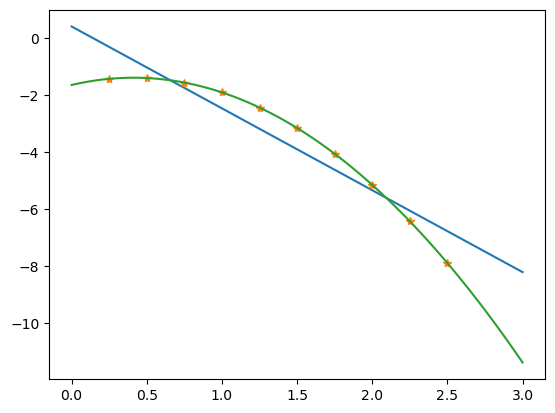

0.9999981168793423

In [6]:
e = np.ones(n)
x2 = x**2

X = np.zeros((n,3))

X[:,0]=e
X[:,1]=x
X[:,2]=x2

p = np.linalg.pinv(X)
b = np.dot(p,y)
display(b)

yyy = b[0]+b[1]*xx+b[2]*xx**2

plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.plot(xx,yyy)
plt.show()

y_hat = np.dot(X,b)
R2_2 = np.sum((y_hat-y_med)**2)/np.sum((y-y_med)**2)
display(R2_2)

In [7]:
x = np.array([36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
            36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
            37.1, 37.1, 37.2, 37.2, 37.2])

media = np.mean(x)
dev = np.std(x)

alpha = 0.01

phi = norm.ppf(1-alpha/2)

il = media - dev/np.sqrt(n)*phi
ir = media + dev/np.sqrt(n)*phi
print("intervallo di confidenza della media al 99%: [{},{}]".format(il,ir))
display(media,dev)

intervallo di confidenza della media al 99%: [36.59782254430311,37.03417745569689]


36.816

0.2678507046845316

In [8]:
alpha =0.05
mu_0 = 37
phi = norm.ppf(1-alpha/2)
Z_0 = (media - mu_0)/dev*np.sqrt(n)
display(phi,np.abs(Z_0))


1.959963984540054

2.1723261477182754

In [9]:
pvalue = 2*(1-norm.cdf(np.abs(Z_0)))
display(pvalue)

0.029831071121754205

In [10]:
beta = 0.1
m = 36.8
delta = (alpha*dev)/np.sqrt(n)

N = (norm.ppf(1-alpha/2)+norm.ppf(1-beta))**2*dev**2/delta**2
display(n)

10